based on
https://www.linkedin.com/pulse/learning-rate-useful-artificial-neural-networks-ahmed-gad/

In [1]:
import numpy  
import matplotlib.pyplot as plt


In [2]:
def activation_function(inpt):  
    if(inpt > 250):  
      return 250 # clip the result to 250  
    else:  
      return inpt # just return the input  

In [3]:
def prediction_error(desired, expected):  
    #calculates the mean of difference between values in desired, expected 
    return numpy.abs(numpy.mean(desired-expected)) # absolute error

In [4]:
def update_weights(weights, predicted, idx, lr):  
    weights = weights + lr*(desired_output[idx] - predicted)*inputs[idx] # updating weights  
    return weights # new updated weights  

In [5]:
#weights = numpy.array([0.05, .1]) #bias & weight of input  - randomly selected.
weights = numpy.array([0.2, .01]) #experiment with different starting weights.
inputs = numpy.array([60, 40, 100, 300, -50, 310]) # training inputs  
desired_output = numpy.array([60, 40, 150, 250, -50, 250]) # training outputs  


In [6]:
def training_loop(inpt, weights, learning_r):  
    error = 1  
    idx = 0 # start by the first training sample  
    iteration = 0 #loop iteration variable
    weights_history = []
    while(iteration < 2000 or error >= 0.01): #while(error >= 0.1):  
        predicted = activation_function(weights[0]*1+weights[1]*inputs[idx])  
        error = prediction_error(desired_output[idx], predicted)  
        weights = update_weights(weights, predicted, idx, learning_r)  
        weights_history.append(weights)
        idx = idx + 1 # go to the next sample  
        idx = idx % inputs.shape[0] # restricts the index to the range of our samples
        #nbb: iterates 2000 times over inputs array which has 6 elements.
        iteration = iteration + 1 # next iteration  
    return error, weights, weights_history

In [7]:
new_inputs = numpy.array([10, 240, 550, -160, 260])  
new_outputs = numpy.array([10, 240, 250, -160, 260])

In [8]:
def predict_outputs(new_inputs, l_rate):
    error, new_weights, weights_hist = training_loop(new_inputs, weights, l_rate)
    print('Learned Weights : ', new_weights)  
    error_ = []
    predicted = []
    for i in range(new_inputs.shape[0]):  
        predicted.append(activation_function(new_weights[0]*1+new_weights[1]*new_inputs[i]))
        error_.append(predicted[i] - new_outputs[i])
        print 'Sample ', i+1, "\t input value:", new_inputs[i], '\t Expected = ', new_outputs[i], '\t Predicted = ', predicted[i]
    print numpy.sum(numpy.square(error_))
    return predicted, weights_hist

In [9]:
def plt_history(history):
    hist_1 = numpy.asarray(history)[:, 0]
    hist_2 = numpy.asarray(history)[:, 1]

    plt.clf()
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(range(0, hist_1.shape[0]), hist_1, s=10, c='b', marker="s", label='weight 1')
    ax1.scatter(range(0, hist_2.shape[0]), hist_2, s=10, c='r', marker="s", label='weight 2')

    plt.legend(loc='lower right');
    plt.show()

('Learned Weights : ', array([ nan,  nan]))
Sample  1 	 input value: 10 	 Expected =  10 	 Predicted =  nan
Sample  2 	 input value: 240 	 Expected =  240 	 Predicted =  nan
Sample  3 	 input value: 550 	 Expected =  250 	 Predicted =  nan
Sample  4 	 input value: -160 	 Expected =  -160 	 Predicted =  nan
Sample  5 	 input value: 260 	 Expected =  260 	 Predicted =  nan
nan


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in add
  


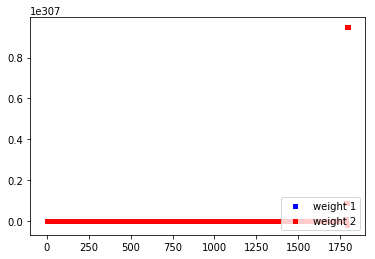

In [19]:
predicted1, w_hist1 = predict_outputs(new_inputs, .0005)
plt_history(w_hist1)

('Learned Weights : ', array([ 1.47558379,  1.28558379]))
Sample  1 	 input value: 10 	 Expected =  10 	 Predicted =  14.3314217051
Sample  2 	 input value: 240 	 Expected =  240 	 Predicted =  250
Sample  3 	 input value: 550 	 Expected =  250 	 Predicted =  250
Sample  4 	 input value: -160 	 Expected =  -160 	 Predicted =  -204.217822829
Sample  5 	 input value: 260 	 Expected =  260 	 Predicted =  250
2173.9770697


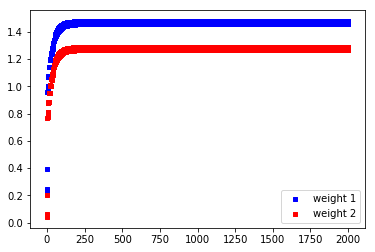

In [17]:
predicted2, w_hist2 = predict_outputs(new_inputs, .00001)
plt_history(w_hist2)# excluded due to weird graph results 

('Learned Weights : ', array([ 1.13474355,  0.94474355]))
Sample  1 	 input value: 10 	 Expected =  10 	 Predicted =  10.5821790359
Sample  2 	 input value: 240 	 Expected =  240 	 Predicted =  227.87319524
Sample  3 	 input value: 550 	 Expected =  250 	 Predicted =  250
Sample  4 	 input value: -160 	 Expected =  -160 	 Predicted =  -150.024224246
Sample  5 	 input value: 260 	 Expected =  260 	 Predicted =  246.768066215
421.998499701


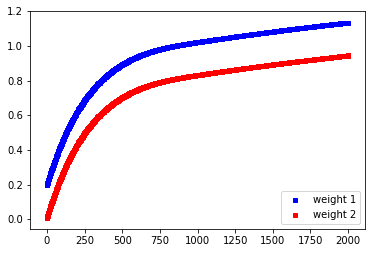

In [12]:
predicted3, w_hist3 = predict_outputs(new_inputs, .0000001)
plt_history(w_hist3)

('Learned Weights : ', array([ 0.99330543,  0.80330543]))
Sample  1 	 input value: 10 	 Expected =  10 	 Predicted =  9.02635975674
Sample  2 	 input value: 240 	 Expected =  240 	 Predicted =  193.786609216
Sample  3 	 input value: 550 	 Expected =  250 	 Predicted =  250
Sample  4 	 input value: -160 	 Expected =  -160 	 Predicted =  -127.535563756
Sample  5 	 input value: 260 	 Expected =  260 	 Predicted =  209.852717864
5705.3149893


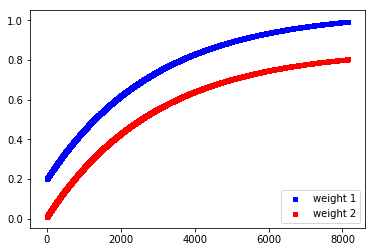

In [13]:
predicted4, w_hist4 = predict_outputs(new_inputs, .00000001)
plt_history(w_hist4)

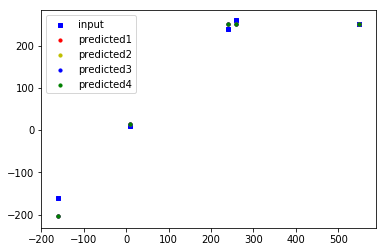

In [14]:
#plot new_outputs vs predicted1/2/3/4
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(new_inputs, new_outputs, s=10, c='b', marker="s", label='input')
ax1.scatter(new_inputs, predicted1, s=10, c='r', marker="o", label='predicted1')
ax1.scatter(new_inputs, predicted1, s=10, c='y', marker="o", label='predicted2')
ax1.scatter(new_inputs, predicted1, s=10, c='b', marker="o", label='predicted3')
ax1.scatter(new_inputs, predicted1, s=10, c='g', marker="o", label='predicted4')


plt.legend(loc='upper left');
plt.show()